In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.network as network
import src.network_utils as net_utils

# Concave Classification

Many of the binary classification problems seen so far involve convex shapes such as triangles and squares. It is straightforward to see how a finite number of hyperplanes could form a convex region. However, as concavity is introduced, the human approach to classification using ideal hyperplanes becomes less obvious. That being said, the Universal Approximation Theorem tells us that it should be possible for a single layer network to classify any region up to an arbitrary precision. The following code shows some example comparisons of how a human might approach the problem of binary classification on complex regions and how the neural network converges via gradient descent.  

## Human Approach

First, consider a neural network consisting of only a single neuron. This network can be defined as $ f: [0,1]\times[0,1] \rightarrow \mathbb{R} $, where 

$$ f(x, y)=\sigma(\langle x, y \rangle \cdot \langle w_1, w_2 \rangle + b) $$ 

When $ w_1, w_2 $ are sufficiently large, the sigmoid function approaches a Heaviside step function. Thus, for simplicity, we will consider the case that 

$$ \sigma(t) =
\left\{
\begin{array}{ll}
      0, & t<0 \\
      1, & t\geq 0 \\
\end{array} 
\right.
$$

Hence,

$$ f(x, y) =
\left\{
\begin{array}{ll}
      0, & xw_1 + yw_2 + b <0 \\
      1, & xw_1 + yw_2 + b \geq 0 \\
\end{array} 
\right.
$$

The line $ xw_1 + yw_2 + b = 0 $ divides the region into positive and negative halfs. Therefore, we can construct $ f(x, y) $ such that $ \langle w_1, w_2 \rangle $ is a vector normal to the line and $ b = -\langle w_1, w_2 \rangle \cdot \langle x_0, y_0 \rangle $, where the line passes through the point $ (x_0, y_0) $.  

Using this method to construct individual hyperplanes, several examples of complex classification regions are built from scratch as shown below.

### Concave Triangle Classification

In [10]:
net = network.Network([network.Linear(2,5), network.Step(), network.Linear(5,1), network.Step()])
net.layers[0].weights = np.array([[1, 0],
                                   [-1, 0],
                                   [0, -1],
                                   [-4, 3],
                                   [4, 3]])
net.layers[0].biases = np.array([[-0.2],
                                  [0.8],
                                  [0.8],
                                  [0.2],
                                  [-3.8]])
net.layers[2].weights = np.array([2, 2, 2, 1, 1])
net.layers[2].biases = -7

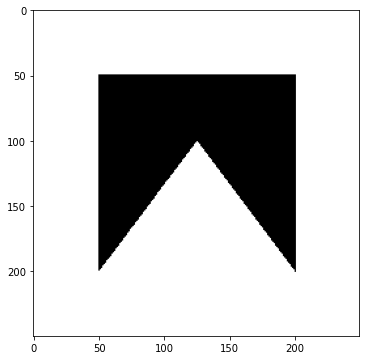

In [11]:
net_arr = net_utils.visualize_2d_function(net.forward_prop, [250, 250])
plt.figure(figsize=(6,6))
plt.imshow(net_arr, cmap='gray_r')
plt.show()

### Square Annulus Classification

In [3]:
net = network.Network([network.Linear(2, 8), network.Step(), network.Linear(8,1), network.Step()])
net.layers[0].weights = np.array([[0, 1],
                                  [0, -1],
                                  [1, 0],
                                  [-1, 0],
                                  [0, -1],
                                  [0, 1],
                                  [-1, 0],
                                  [1, 0]])
net.layers[0].biases = np.array([[-0.2],
                                 [0.8],
                                 [-0.2],
                                 [0.8],
                                 [0.3],
                                 [-0.7],
                                 [0.3],
                                 [-0.7]])
net.layers[2].weights = np.array([4, 4, 4, 4, 1, 1, 3, 3])
net.layers[2].biases = -17

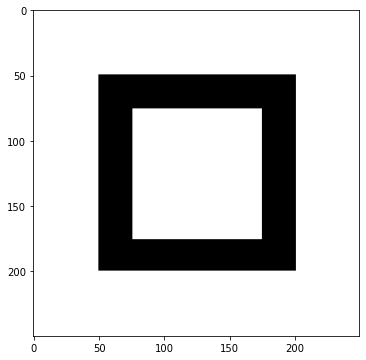

In [9]:
net_arr = net_utils.visualize_2d_function(net.forward_prop, [250, 250])
plt.figure(figsize=(6,6))
plt.imshow(net_arr, cmap='gray_r')
plt.show()

## Network  Approximation

Concave classification problems were tested and visualized to explore the concave capabilities of single layer and multi-layer networks. The two test problems of interest were the `concave_triangles.png` and the `square_annulus.png` images.  

The concave triangle test problem was conducted for a network with 12 neurons, as well as multi-layer networks with two hidden layers of 6 and 2 neurons and 12 and 4 neurons, respectively. 

The square annulus test problem was conducted for a network with 32 neurons, as well as a multi-layer network with two hidden layers of 32 and 8 neurons, respectively.  

All of the tests were conducted for a learning rate of 12 and a training period of 30 epochs for the concave triangles problem. The network training took significantly longer and required several attempts to converge to an approximation of the square annulus region. A learning rate of 8 and a training period of 300 epochs were used. 

The code below shows an example of a single test case, the other cases were run with minimal modification to the code. See `out/concave_classification/` for the results of all tests.

Accuracy in epoch 1 / 300: 73.72%
Accuracy in epoch 31 / 300: 73.72%
Accuracy in epoch 61 / 300: 87.9%
Accuracy in epoch 91 / 300: 94.28%
Accuracy in epoch 121 / 300: 96.56%
Accuracy in epoch 151 / 300: 95.68%
Accuracy in epoch 181 / 300: 95.5%
Accuracy in epoch 211 / 300: 98.02%
Accuracy in epoch 241 / 300: 95.14%
Accuracy in epoch 271 / 300: 96.28%
Accuracy in epoch 300 / 300: 96.92%


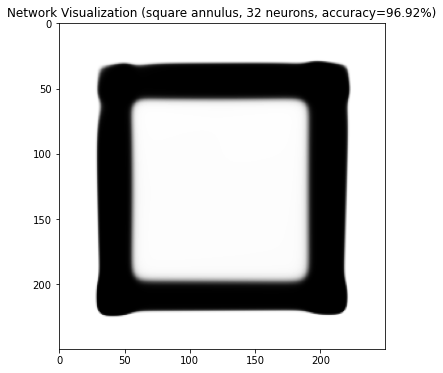

In [47]:
image_src = 'data/square_annulus.png'
num_neurons = 32
mini_batch_size = 16
epochs = 300
epoch_disp = 30
eta = 8

data, labels = net_utils.generate_image_data(image_src, 15000, (1000,1000))
training_data = data[0:10000]
training_labels = labels[0:10000]
test_data = data[10000:15000]
test_labels = labels[10000:15000]

net = network.Network([network.Linear(2, num_neurons),
                       network.Sigmoid(),
                       network.Linear(num_neurons, 1),
                       network.Sigmoid()])
    
net.train(training_data, training_labels, mini_batch_size, eta, epochs, epoch_disp, 
          evaluation='percentage', test_data=test_data, test_labels=test_labels)

acc = net.evaluate_percentage(test_data, test_labels)
net_arr = net_utils.visualize_2d_function(net.forward_prop, [250, 250], convert=False)
plt.figure(figsize=(8,6))
plt.imshow(net_arr, cmap='gray')
plt.title(f'Network Visualization (square annulus, 32 neurons, accuracy={round(acc, 2)}%)')
plt.savefig('out/concave_classification/square_annulus_32.png')
plt.show()

## Results

Initially, it may not seem obvious how a concave region can be constructed using only a linear combination of ideal hyperplanes. However, as shown above, both a human approach and a nerual network approach can manage to classify these regions.

As expected, the neural networks did not converge to the optimal regions found using the human approach. However, some regions cannot be easily constructed using a finite number of hyperplanes. Take for instance the example region below. Due to symmetry, we can't find a set of a few hyperplanes to exactly classify the region. This is where the advantage of the neural network approach becomes evident.  

The construction of a region such as the one below with a finite number of hyperplanes is the motivation behind the Universal Approximation Theorem for neural networks and is explored in `universal_approximation.ipynb`.

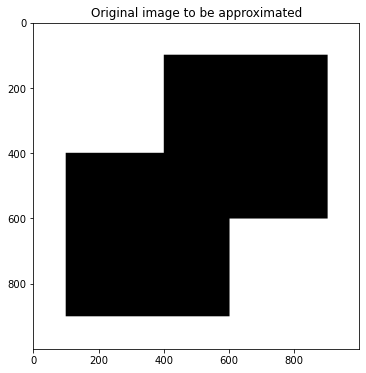

In [49]:
def func(x):
    return int(((x[0] >= 0.1) & (x[0] <= 0.6) & (x[1] >= 0.1) & (x[1] <= 0.6)) |
               ((x[0] >= 0.4) & (x[0] <= 0.9) & (x[1] >= 0.4) & (x[1] <= 0.9)))

im = net_utils.visualize_2d_function(func, [1000, 1000], convert=True)
plt.figure(figsize=(8,6))
plt.imshow(im, cmap='gray_r')
plt.title('Original image to be approximated')
plt.show()

Accuracy in epoch 1 / 300: 46.68%
Accuracy in epoch 31 / 300: 92.26%
Accuracy in epoch 61 / 300: 90.98%
Accuracy in epoch 91 / 300: 92.54%
Accuracy in epoch 121 / 300: 96.32%
Accuracy in epoch 151 / 300: 95.76%
Accuracy in epoch 181 / 300: 96.12%
Accuracy in epoch 211 / 300: 95.74%
Accuracy in epoch 241 / 300: 95.54%
Accuracy in epoch 271 / 300: 96.36%
Accuracy in epoch 300 / 300: 96.08%


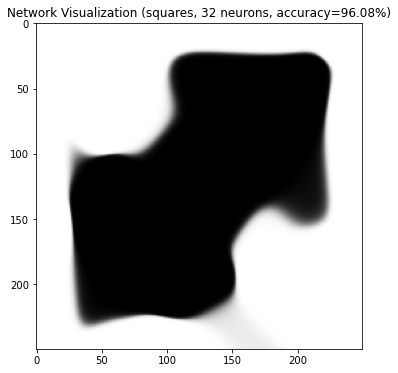

In [52]:
n = 15000
size = [1000, 1000]
data = np.random.randint(0, [size[1], size[0]], size=[n, 2, 1])
labels = np.array([int(im[x[0], x[1]]) for x in data]).reshape(n,1,1)
data = np.array([ np.multiply(x, [[1/size[1]], [1/size[0]]]) for x in data])

training_data = data[0:10000]
training_labels = labels[0:10000]
test_data = data[10000:15000]
test_labels = labels[10000:15000]

num_neurons = 32
mini_batch_size = 16
epochs = 300
epoch_disp = 30
eta = 8

net = network.Network([network.Linear(2, num_neurons),
                       network.Sigmoid(),
                       network.Linear(num_neurons, 1),
                       network.Sigmoid()])
    
net.train(training_data, training_labels, mini_batch_size, eta, epochs, epoch_disp, 
          evaluation='percentage', test_data=test_data, test_labels=test_labels)

acc = net.evaluate_percentage(test_data, test_labels)
net_arr = net_utils.visualize_2d_function(net.forward_prop, [250, 250], convert=False)
plt.figure(figsize=(8,6))
plt.imshow(net_arr, cmap='gray_r')
plt.title(f'Network Visualization (squares, 32 neurons, accuracy={round(acc, 2)}%)')
plt.savefig('out/concave_classification/squares_32.png')
plt.show()